<a href="https://colab.research.google.com/github/audreyakwenye/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
df2 = df[df['bedrooms'] <= 15]  



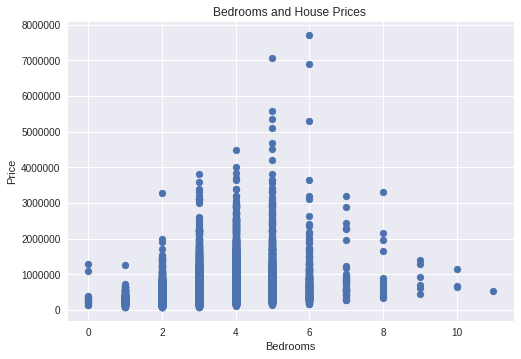

In [3]:
plt.scatter(df2.bedrooms, df2.price)
plt.ylabel("Price")
plt.xlabel("Bedrooms")
plt.title("Bedrooms and House Prices ")
plt.show()

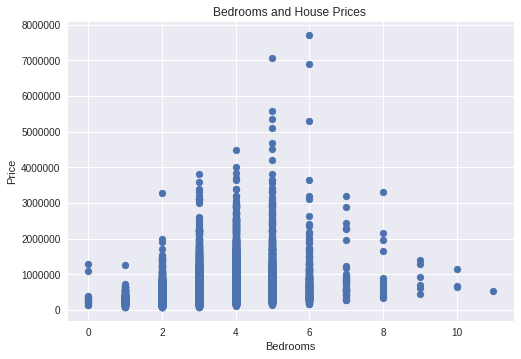

In [4]:
import numpy as np


X = df2['bedrooms'].values[:, np.newaxis]
Y = df2['price'].values

plt.scatter(X, Y)
plt.ylabel("Price")
plt.xlabel("Bedrooms")
plt.title("Bedrooms and House Prices ")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X = df2['bedrooms'].values[:, np.newaxis]
y = df2['price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

(21612, 1) 

(10806, 1)
(10806, 1)
(10806,)
(10806,)
Coefficient: 
 [120432.72745667]

 Intercept:  132465.33392531308
MSE is 132226137156.41327
RMSE is 363629.1203361101
R^2 is 0.10174309654409974


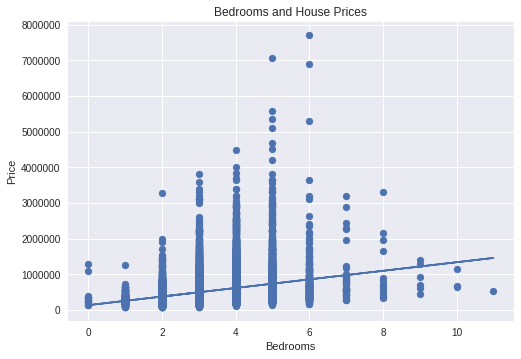

In [6]:
m_hat = model.coef_[0]
b_hat = model.intercept_

# Plot the points
plt.scatter(df2.bedrooms, df2.price)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)

# Graph axes and title
plt.ylabel("Price")
plt.xlabel("Bedrooms")
plt.title("Bedrooms and House Prices")
plt.show()

Prediction [array([493763.51629532]), array([493763.51629532]), array([373330.78883865]), array([614196.24375199]), array([493763.51629532]), array([614196.24375199]), array([493763.51629532]), array([493763.51629532]), array([493763.51629532]), array([493763.51629532]), array([493763.51629532]), array([373330.78883865]), array([493763.51629532]), array([493763.51629532]), array([734628.97120865]), array([614196.24375199]), array([493763.51629532]), array([614196.24375199]), array([373330.78883865]), array([493763.51629532]), array([614196.24375199]), array([493763.51629532]), array([734628.97120865]), array([373330.78883865]), array([493763.51629532]), array([493763.51629532]), array([493763.51629532]), array([493763.51629532]), array([493763.51629532]), array([614196.24375199]), array([493763.51629532]), array([373330.78883865]), array([614196.24375199]), array([493763.51629532]), array([614196.24375199]), array([493763.51629532]), array([614196.24375199]), array([614196.24375199]), 

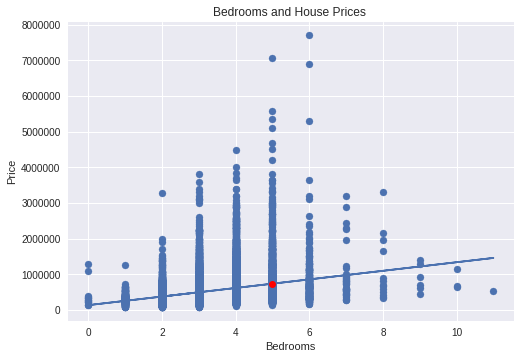

In [7]:
# Make a single prediction for 70 degrees farenheit
x_value = 5

prediction = m_hat*x_value + b_hat
print("Prediction", y_hat)

b_hat = model.intercept_

# Plot the points
plt.scatter(df2.bedrooms, df2.price)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)
plt.plot(x_value, prediction, 'ro')

# Graph axes and title
plt.ylabel("Price")
plt.xlabel("Bedrooms")
plt.title("Bedrooms and House Prices ")

# Plot the error
plt.arrow(55.2, 600, 0, 150, color='black')
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [23]:
from sklearn.linear_model import LinearRegression

# The Scikit-Learn code is the same every time.
y = df2.loc[:, ['price']].values
X = df2.loc[:, ['bedrooms','condition']].values

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, y, test_size=.5, random_state=42)

print(X.shape, "\n")

print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

(21612, 2) 

(10806, 2)
(10806, 2)
(10806, 1)
(10806, 1)
Slope Coefficients:  [127255.84755867  15978.01863791]

Intercept Value:  [56823.92123047]


In [24]:
y_test_predict1 = model.predict(X_test1)

MSE = mean_squared_error(Y_test1, y_test_predict1)

RMSE = (np.sqrt(mean_squared_error(Y_test1, y_test_predict1)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R21 = r2_score(Y_test1, y_test_predict1)

print('R^2 is {}'.format(R21))

MSE is 131946169205.20741
RMSE is 363243.95274416805
R^2 is 0.10364501359563993


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
from sklearn.model_selection import train_test_split

y2 = df['price']
X2 = df.drop(['price', 'date'], axis=1)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=.5, random_state=42)

print(X2.shape, "\n")

print(X_train2.shape)
print(X_test2.shape)
print(Y_train2.shape)
print(Y_test2.shape)




(21613, 19) 

(10806, 19)
(10807, 19)
(10806,)
(10807,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train2, Y_train2)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [-2.00506453e-06 -3.41181059e+04  3.97473262e+04  9.89756793e+01
  9.32592572e-02  1.00895137e+04  5.72441870e+05  5.38583443e+04
  2.45630510e+04  9.96587887e+04  5.99886239e+01  3.89870555e+01
 -2.48106275e+03  2.10197652e+01 -5.41292831e+02  5.90386757e+05
 -1.82472792e+05  2.65417221e+01 -3.89604248e-01]

 Intercept:  6923623.552565315


In [27]:
y_test_predict2 = model.predict(X_test2)

MSE = mean_squared_error(Y_test2, y_test_predict2)

RMSE = (np.sqrt(mean_squared_error(Y_test2, y_test_predict2)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R22 = r2_score(Y_test2, y_test_predict2)

print('R^2 is {}'.format(R22))

MSE is 46543830648.17032
RMSE is 215740.19247272937
R^2 is 0.6875251235271282


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
